**CODSOFT INTERNSHIP CREDIT CARD FRAUD DETECTION**

In [13]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
# import libs
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay ,precision_score,recall_score,f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [15]:
# Import Data
df = pd.read_csv('/creditcard.csv')

In [16]:
print(df.shape)
print(df.info())
df.head()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


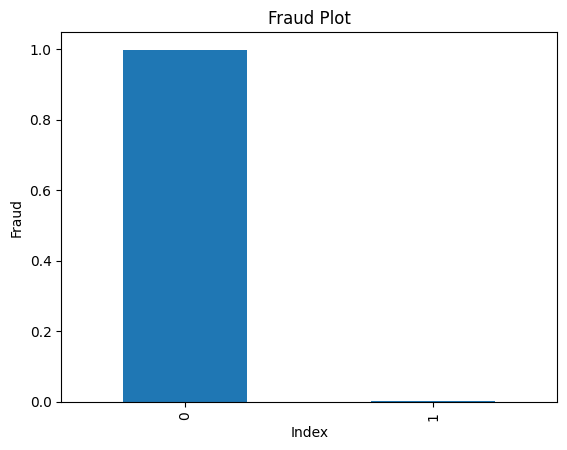

In [17]:
df['Class'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Index')
plt.ylabel('Fraud')
plt.title('Fraud Plot')
plt.show()

In [18]:
fraudpercentage = df['Class'].value_counts(normalize=True)[1] *100
fraudpercentage

0.1727485630620034

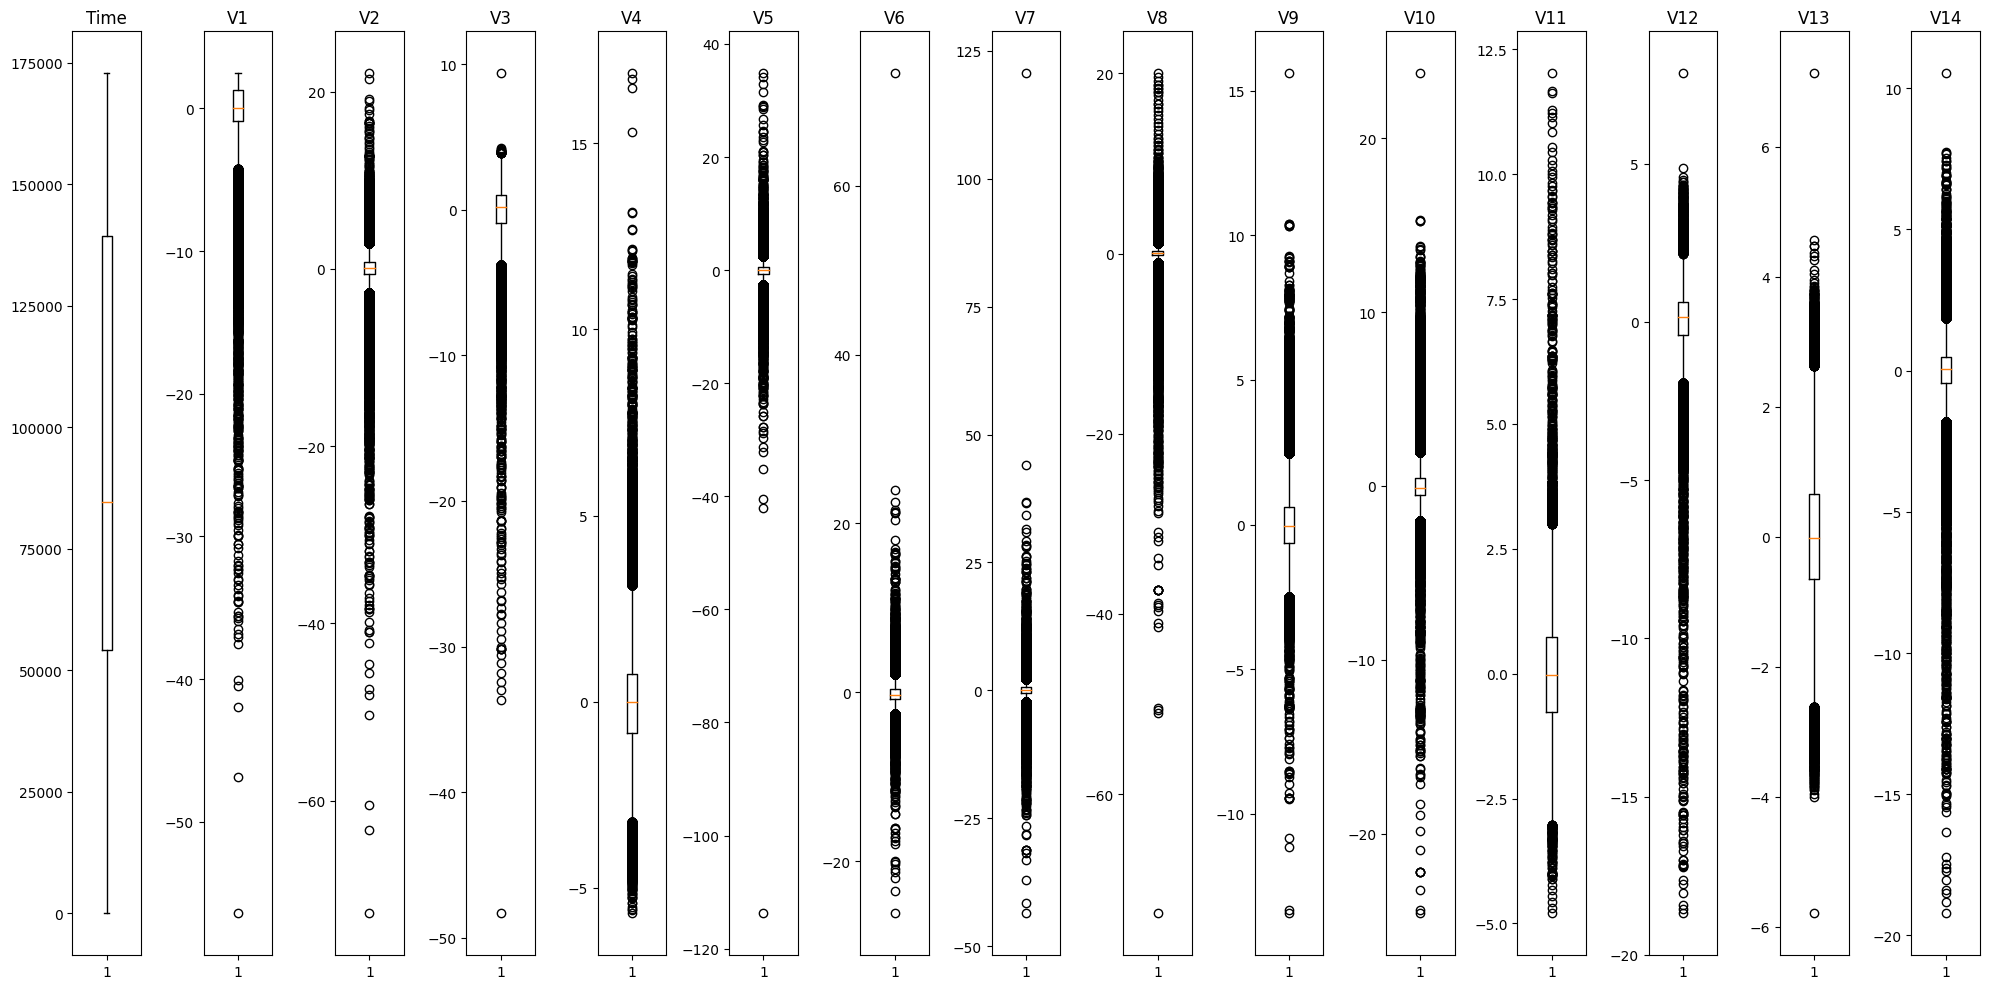

In [19]:
#make boxplots to check outlires
fig,axis = plt.subplots(1,15,figsize=(20,10))
for i, ax in enumerate(axis.flat):
    ax.boxplot(df.drop(columns=['Class']).iloc[:,i])
    ax.set_title(df.drop(columns=['Class']).columns[i])
plt.tight_layout()

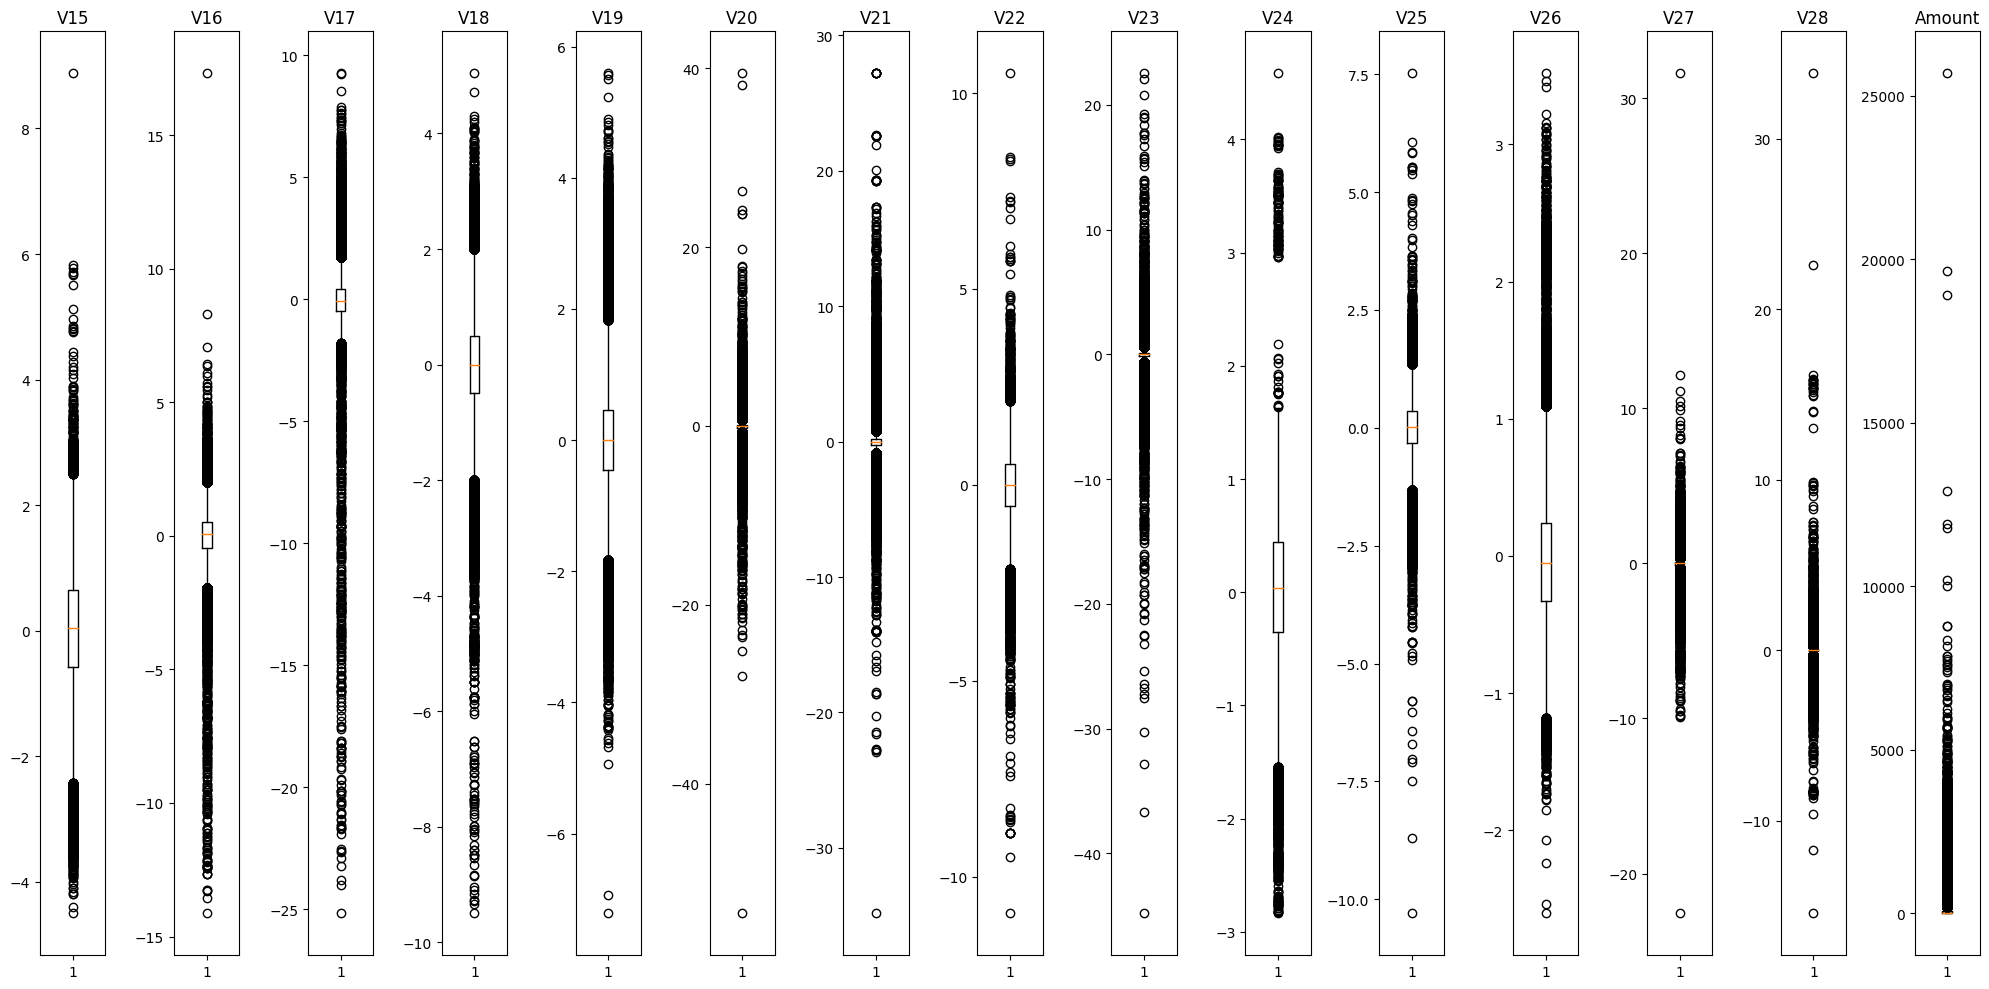

In [20]:
#make boxplots to check outlires
fig,axis = plt.subplots(1,15,figsize=(20,10))
for i, ax in enumerate(axis.flat):
    ax.boxplot(df.drop(columns=['Class']).iloc[:,i+15])
    ax.set_title(df.drop(columns=['Class']).columns[i+15])
plt.tight_layout()

In [21]:
# split our data to target and feautres
target ='Class'
X = df.drop(columns=target)
y = df[target]

In [22]:
# split our data to test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(227845, 30)
(227845,)
(56962, 30)
(56962,)


In [23]:
# oversample
ROS = RandomOverSampler(sampling_strategy = 1)
X_train_over, y_train_over = ROS.fit_resample(X_train,y_train)
X_test_over, y_test_over = ROS.fit_resample(X_test,y_test)

print(X_train_over.shape)
print(y_train_over.shape)
print(X_test_over.shape)
print(y_test_over.shape)

(454900, 30)
(454900,)
(113730, 30)
(113730,)


In [24]:
# undersample
RUS = RandomUnderSampler(sampling_strategy = 1)
X_train_under, y_train_under = RUS.fit_resample(X_train,y_train)
X_test_under, y_test_under = RUS.fit_resample(X_test,y_test)

print(X_train_under.shape)
print(y_train_under.shape)
print(X_test_under.shape)
print(y_test_under.shape)

(790, 30)
(790,)
(194, 30)
(194,)


In [25]:
y_baseline = df['Class'].value_counts(normalize=True).max()
print(f'baseline score = {y_baseline}')

baseline score = 0.9982725143693799


In [26]:
# logistic model for our normal data and oversampled data and undersampled
log = LogisticRegression(max_iter=400)
logover = LogisticRegression(max_iter=400)
logunder = LogisticRegression(max_iter=400)
# fit our normal data
log.fit(X_train,y_train)
# fit our oversampled data
logover.fit(X_train_over,y_train_over)
# fit our oversampled data
logunder.fit(X_train_under,y_train_under)

LogisticRegression(max_iter=400)

Train Data

In [27]:
# get the prediction score for our logistic Regression model on our train data
print(f'The accuracy score for logistic Regression Model On Normal Data = {accuracy_score(y_train,log.predict(X_train))}')
print(f'The accuracy score for logistic Regression Model On Oversampled Data = {accuracy_score(y_train,logover.predict(X_train))}')
print(f'The accuracy score for logistic Regression Model On Undersampled Data = {accuracy_score(y_train,logunder.predict(X_train))}')

The accuracy score for logistic Regression Model On Normal Data = 0.9991046544800193
The accuracy score for logistic Regression Model On Oversampled Data = 0.9567908007636771
The accuracy score for logistic Regression Model On Undersampled Data = 0.9621979854725801


Test Data

In [28]:
# get the prediction score for our logistic Regression model on our test data
print(f'The accuracy score for logistic Regression Model On Normal Data = {accuracy_score(y_test,log.predict(X_test))}')
print(f'The accuracy score for logistic Regression Model On Oversampled Data = {accuracy_score(y_test,logover.predict(X_test))}')
print(f'The accuracy score for logistic Regression Model On Undersampled Data = {accuracy_score(y_test,logunder.predict(X_test))}')

The accuracy score for logistic Regression Model On Normal Data = 0.9992451107756047
The accuracy score for logistic Regression Model On Oversampled Data = 0.9575155366735718
The accuracy score for logistic Regression Model On Undersampled Data = 0.9621853165268074


In [29]:
# as you see we our accuracy score is not the best thing in compare to our baseline score
# but thats ok in these types of model our most important metrics is Recall

In [30]:
# Make Confusion matrix function to see more details about our model perdiction
def confusion(model,X,y):
    ConfusionMatrixDisplay.from_predictions(y,model.predict(X))

In [31]:
# function to evaluate model
def evalua(model,X,y):
    print('precision_score =',precision_score(y,model.predict(X)).round(2)*100,'%')
    print('recall_score =',recall_score(y,model.predict(X)).round(2)*100,'%')
    print('f1_score =',f1_score(y,model.predict(X)).round(2)*100,'%')
    print('----------------------------------------')

In [32]:
# print log models score
print('Normal Data')
evalua(log,X_test,y_test)

print('Oversampled Data')
evalua(logover,X_test,y_test)
print('Undersampled Data')
evalua(logunder,X_test,y_test)

Normal Data
precision_score = 91.0 %
recall_score = 62.0 %
f1_score = 74.0 %
----------------------------------------
Oversampled Data
precision_score = 3.0 %
recall_score = 87.0 %
f1_score = 6.0 %
----------------------------------------
Undersampled Data
precision_score = 4.0 %
recall_score = 86.0 %
f1_score = 7.000000000000001 %
----------------------------------------


None


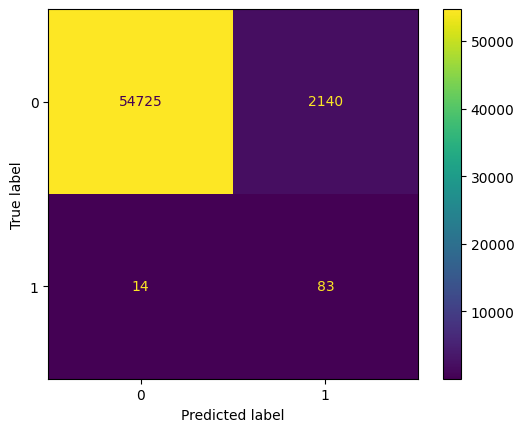

In [33]:
# Our Higest Recall andd precision and f1 score is undersampled data
print(confusion(logunder,X_test,y_test))

In [34]:
# change thereshold function to increase recall
def thershold(model,X,y):
    predicted_props = model.predict_proba(X)

    # set new threshold
    new_threshold = 0.2
    y_Thereshold = []
    predictions = (predicted_props > new_threshold).astype(int)
    for i,j in predictions:
        y_Thereshold.append(j)

    return y_Thereshold

In [35]:
# assign new y value
y_log = thershold(log,X_test,y_test)
y_log_over = thershold(logover,X_test,y_test)
y_log_under = thershold(logunder,X_test,y_test)

In [36]:
#Lets check Scores for our new threshold
# function to evaluate model
def evaluat(y_thres,y):
    print('precision_score =',precision_score(y,y_thres).round(2)*100,'%')
    print('recall_score =',recall_score(y,y_thres).round(2)*100,'%')
    print('f1_score =',f1_score(y,y_thres).round(2)*100,'%')
    print('----------------------------------------')
# print log models score
print('Normal Data')
evaluat(y_log,y_test)
print('Oversampled Data')
evaluat(y_log_over,y_test)
print('Undersampled Data')
evaluat(y_log_under,y_test)

Normal Data
precision_score = 77.0 %
recall_score = 68.0 %
f1_score = 72.0 %
----------------------------------------
Oversampled Data
precision_score = 1.0 %
recall_score = 93.0 %
f1_score = 1.0 %
----------------------------------------
Undersampled Data
precision_score = 0.0 %
recall_score = 92.0 %
f1_score = 1.0 %
----------------------------------------


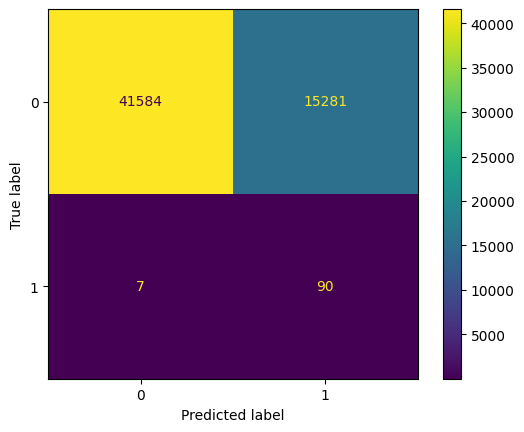

In [37]:
# Plot our best score Data variation in log
ConfusionMatrixDisplay.from_predictions(y_test,y_log_over)

Oversampled Data
precision_score = 1.0 %
recall_score = 93.0 %
f1_score = 1.0 %
----------------------------------------


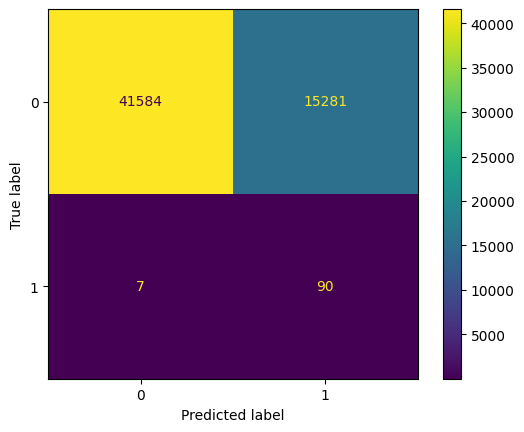

In [38]:
# Our Best model for this progject is "logover" with thres hold
# IN other project we may change diffrent model but where we value recall other than other metrics
print('Oversampled Data')
evaluat(y_log_over,y_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_log_over)

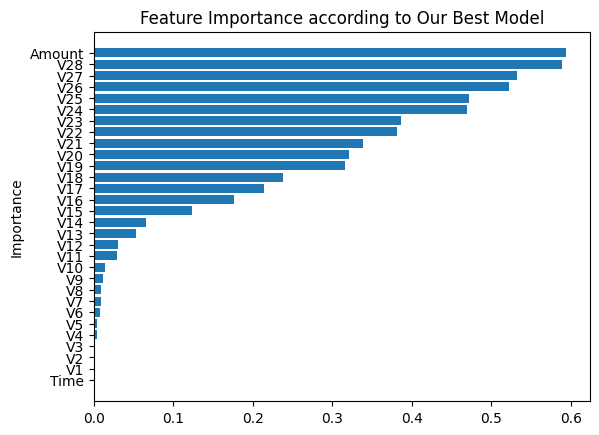

In [39]:
# Get the feature importances
importance = abs(logover.coef_[0])
importance.sort()

# Plot the feature importances
plt.barh(X.columns, importance)
plt.title('Feature Importance according to Our Best Model')
plt.ylabel('Importance')
plt.show()